In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [142]:
# Loading Data
customers = pd.read_csv("Customers.csv")
inventory = pd.read_csv("Inventory.csv")
order_items = pd.read_csv("Order_Items.csv")
orders = pd.read_csv("Orders.csv")
products = pd.read_csv("Products.csv")
stores = pd.read_csv("Stores.csv")
suppliers = pd.read_csv("Suppliers.csv")

print("All files loaded successfully.")

All files loaded successfully.


In [143]:
#Merging Data Frame
df = order_items.merge(products, on="product_id", how="left")
df = df.merge(orders, on="order_id", how="left")
df = df.merge(stores, on="store_id", how="left")
df = df.merge(customers, on="customer_id", how="left")

# Create calculated columns
df["revenue"] = df["quantity"] * df["unit_price"]
df["profit"] = df["quantity"] * (df["unit_price"] - df["cost_price"])
df["profit_margin"] = df["profit"] / df["revenue"]

print("Merged dataset shape:", df.shape)
df.head()

Merged dataset shape: (44908, 27)


,order_id,product_id,quantity,unit_price,category,sub_category,brand,cost_price,selling_price,supplier_id,...,store_size_sqft,opening_date,age,gender,city_y,join_date,loyalty_status,revenue,profit,profit_margin
0,1,281,3,540.81,Pharma,Sub3,BrandC,482.45,540.81,17,...,2207,2019-07-14,51,Male,Pune,2021-07-22,Gold,1622.43,175.08,0.107912
1,1,30,1,242.57,Clothing,Sub1,BrandC,190.96,242.57,9,...,2207,2019-07-14,51,Male,Pune,2021-07-22,Gold,242.57,51.61,0.212763
2,2,190,1,121.83,Grocery,Sub3,BrandB,84.37,121.83,18,...,4751,2018-04-25,42,Female,Hyderabad,2020-07-24,Silver,121.83,37.46,0.307478
3,2,74,1,55.99,Grocery,Sub2,BrandB,39.30,55.99,23,...,4751,2018-04-25,42,Female,Hyderabad,2020-07-24,Silver,55.99,16.69,0.298089
4,2,120,1,237.52,Clothing,Sub3,BrandC,167.70,237.52,24,...,4751,2018-04-25,42,Female,Hyderabad,2020-07-24,Silver,237.52,69.82,0.293954


In [144]:
# TRANSACTION-LEVEL REVENUE DISTRIBUTION

#Summary Statistics
df["revenue"].describe()

count    44908.000000
mean       860.660438
std        652.591745
min         13.360000
25%        341.310000
50%        671.340000
75%       1254.630000
max       2890.560000
Name: revenue, dtype: float64

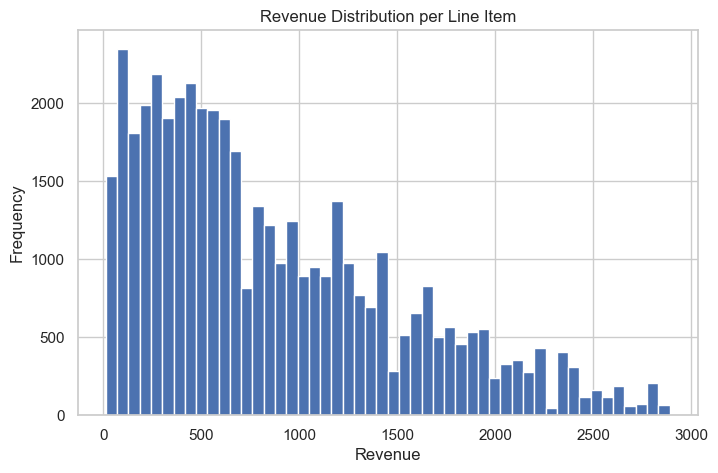

In [145]:
#Revenue Histogram
plt.figure(figsize=(8,5))
plt.hist(df["revenue"], bins=50)
plt.title("Revenue Distribution per Line Item")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

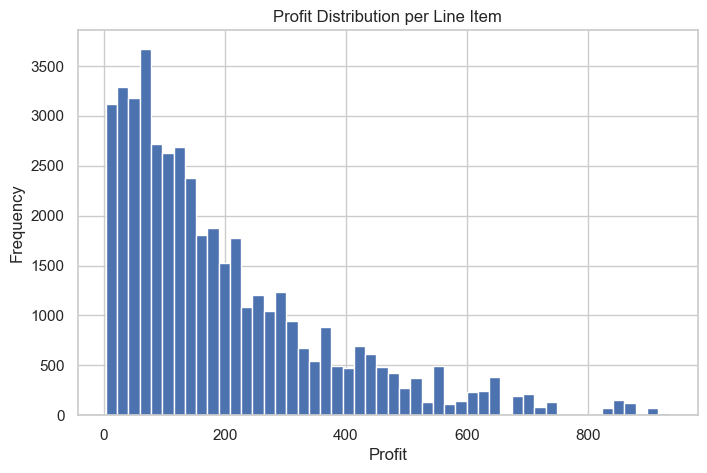

In [146]:
#Profit Distribution
df["profit"].describe()

plt.figure(figsize=(8,5))
plt.hist(df["profit"], bins=50)
plt.title("Profit Distribution per Line Item")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

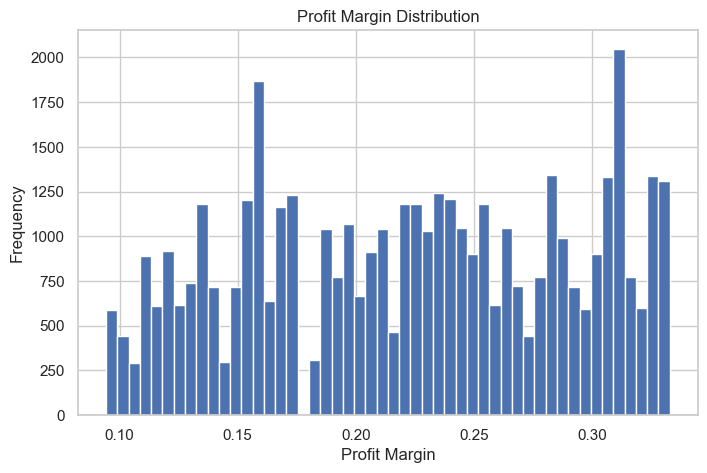

In [147]:
#Profit Margin Distribution
df["profit_margin"].describe()

plt.figure(figsize=(8,5))
plt.hist(df["profit_margin"], bins=50)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()

In [148]:
#Category-Level Margin Comparison
category_margin = df.groupby("category")["profit_margin"].mean().sort_values(ascending=False)
category_margin

category
Electronics    0.231064
Grocery        0.222115
Clothing       0.221637
Pharma         0.218545
Name: profit_margin, dtype: float64

In [149]:
# CORRELATION ANALYSIS
#Does higher quantity - higher revenue?
#Does store size - higher revenue?
#Does price - higher margin?
correlation_matrix = df[["quantity", "unit_price", "cost_price", "revenue", "profit"]].corr()
correlation_matrix

,quantity,unit_price,cost_price,revenue,profit
quantity,1.000000,0.010106,0.010793,0.595323,0.508341
unit_price,0.010106,1.000000,0.984667,0.738708,0.702685
cost_price,0.010793,0.984667,1.000000,0.727956,0.629262
revenue,0.595323,0.738708,0.727956,1.000000,0.916967
profit,0.508341,0.702685,0.629262,0.916967,1.000000


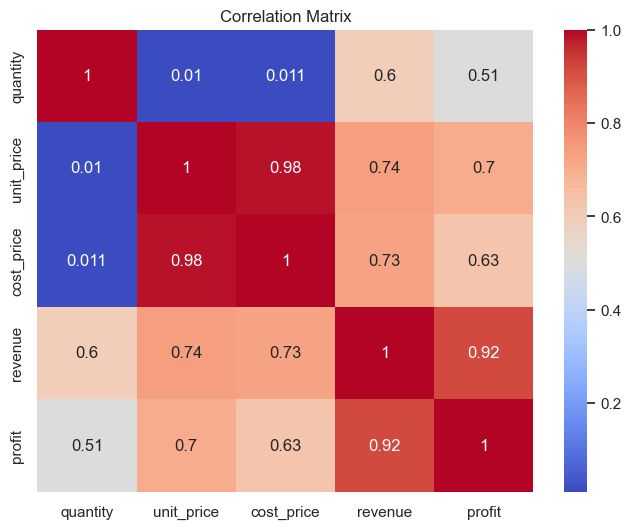

In [150]:
#Visualising
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [151]:
#Pareto Analysis (80/20 Rule)
#Do top 20% products generate 80% revenue?
product_revenue = df.groupby("product_id")["revenue"].sum().sort_values(ascending=False)

cumulative_pct = product_revenue.cumsum() / product_revenue.sum()

cumulative_pct.head(20)

product_id
212    0.007899
27     0.015644
53     0.023109
262    0.030210
87     0.037250
163    0.044207
153    0.051063
207    0.057873
73     0.064683
72     0.071426
134    0.078127
107    0.084821
244    0.091464
283    0.098060
123    0.104586
267    0.111093
135    0.117558
279    0.123931
93     0.130292
118    0.136643
Name: revenue, dtype: float64

In [152]:
top_20_percent_products = int(0.2 * len(product_revenue))

revenue_top_20pct = product_revenue.iloc[:top_20_percent_products].sum() / product_revenue.sum()

print("Revenue from Top 20% Products:", revenue_top_20pct)

#Top 20% of products generate only 36% of total revenue.
# So the Revenue is distributed across many products

Revenue from Top 20% Products: 0.3635149969881597


In [153]:
#Customer Purchase Frequency Distribution : Are most customers one-time buyers?
customer_orders = df.groupby("customer_id")["order_id"].nunique()
customer_orders.describe()

count    2986.000000
mean        5.023443
std         2.208129
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        13.000000
Name: order_id, dtype: float64

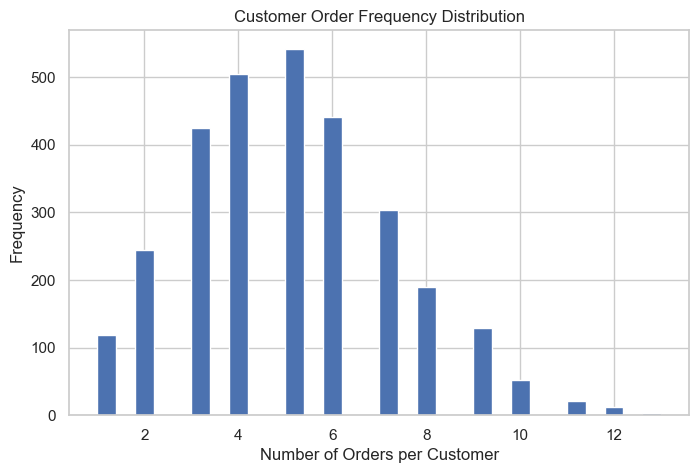

In [154]:
plt.figure(figsize=(8,5))
plt.hist(customer_orders, bins=30)
plt.title("Customer Order Frequency Distribution")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Frequency")
plt.show()

#Moderate repeat rate
#Stable customer base
#No extreme loyalty concentration
#No extreme churn visible

In [155]:
#Repeat Purchase Rate
repeat_rate = (customer_orders > 1).mean()
print("Repeat Purchase Rate:", repeat_rate)

# Are we losing customers?
#No, repeat rate is extremely strong 96%.
#Customer churn risk appears low.

Repeat Purchase Rate: 0.9604822505023443


In [156]:
#Revenue Per Customer Distribution
customer_revenue = df.groupby("customer_id")["revenue"].sum()
customer_revenue.describe()

count     2986.000000
mean     12943.917934
std       6713.048177
min         26.720000
25%       7929.412500
50%      12267.210000
75%      17134.835000
max      43959.620000
Name: revenue, dtype: float64

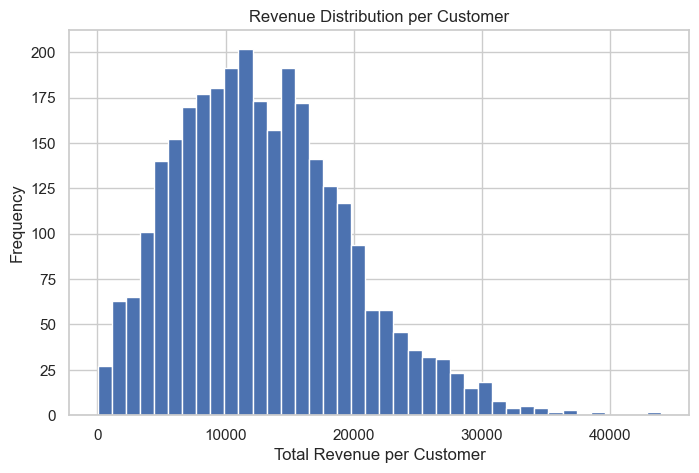

In [157]:
plt.figure(figsize=(8,5))
plt.hist(customer_revenue, bins=40)
plt.title("Revenue Distribution per Customer")
plt.xlabel("Total Revenue per Customer")
plt.ylabel("Frequency")
plt.show()

In [158]:
#STORE PERFORMANCE PATTERNS
#Store Revenue + Profit + Margin
store_summary = df.groupby("city_x").agg(
    revenue=("revenue","sum"),
    profit=("profit","sum"),
    quantity=("quantity","sum"),
    orders=("order_id","nunique"),
    customers=("customer_id","nunique")
).sort_values("revenue", ascending=False)

store_summary["aov"] = store_summary["revenue"] / store_summary["orders"]
store_summary["profit_margin"] = store_summary["profit"] / store_summary["revenue"]

store_summary
print(store_summary)

               revenue      profit  quantity  orders  customers          aov  \
city_x                                                                         
Hyderabad  11748109.36  2699820.80     34078    4557       2343  2578.035848   
Bangalore  11579378.52  2643502.43     33786    4518       2341  2562.943453   
Mumbai      7714126.74  1763827.78     22468    2941       1872  2622.960469   
Chennai     7608924.33  1743034.10     22150    2984       1908  2549.907617   

           profit_margin  
city_x                    
Hyderabad       0.229809  
Bangalore       0.228294  
Mumbai          0.228649  
Chennai         0.229078  


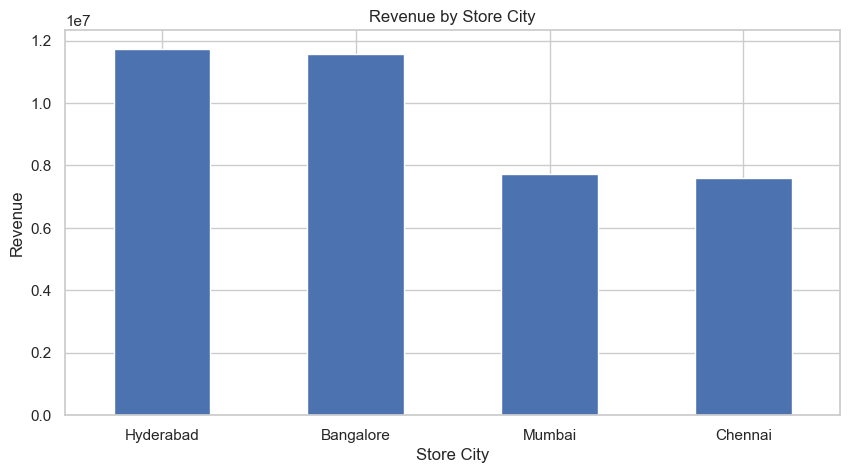

In [159]:
#Visualization -Revenue by Store City
import matplotlib.pyplot as plt

store_summary["revenue"].plot(kind="bar", figsize=(10,5))
plt.title("Revenue by Store City")
plt.xlabel("Store City")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

In [160]:
#Customer vs Store City Cross Insight
cross_city = df.groupby(["city_y","city_x"]).agg(
    revenue=("revenue","sum"),
    orders=("order_id","nunique")
).reset_index().sort_values("revenue", ascending=False)

cross_city.head(15)
print(cross_city.head(15))

       city_y     city_x     revenue  orders
14     Mumbai  Hyderabad  2512697.54     977
8   Hyderabad  Bangalore  2504357.46     942
6     Chennai  Hyderabad  2427338.67     959
2   Bangalore  Hyderabad  2304333.14     906
16       Pune  Bangalore  2294853.42     881
10  Hyderabad  Hyderabad  2275803.98     856
0   Bangalore  Bangalore  2265572.79     896
4     Chennai  Bangalore  2259475.82     891
12     Mumbai  Bangalore  2255119.03     908
18       Pune  Hyderabad  2227936.03     859
15     Mumbai     Mumbai  1631306.22     608
7     Chennai     Mumbai  1618479.81     601
13     Mumbai    Chennai  1547831.93     612
17       Pune    Chennai  1541481.74     598
9   Hyderabad    Chennai  1519325.02     596


In [161]:
#Revenue Outliers
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

revenue_outliers = df[(df["revenue"] < lower_bound) | (df["revenue"] > upper_bound)]

print("Revenue Outliers Count:", len(revenue_outliers))
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Revenue Outliers Count: 542
Lower Bound: -1028.67
Upper Bound: 2624.6099999999997


In [162]:
#Profit Outliers
Q1_p = df["profit"].quantile(0.25)
Q3_p = df["profit"].quantile(0.75)
IQR_p = Q3_p - Q1_p

lower_p = Q1_p - 1.5 * IQR_p
upper_p = Q3_p + 1.5 * IQR_p

profit_outliers = df[(df["profit"] < lower_p) | (df["profit"] > upper_p)]

print("Profit Outliers Count:", len(profit_outliers))

Profit Outliers Count: 1971


In [163]:
#Discount Outliers
Q1_d = df["discount"].quantile(0.25)
Q3_d = df["discount"].quantile(0.75)
IQR_d = Q3_d - Q1_d

lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d

discount_outliers = df[(df["discount"] < lower_d) | (df["discount"] > upper_d)]

print("Discount Outliers Count:", len(discount_outliers))

Discount Outliers Count: 0


In [164]:
#Negative Profit Margin Check
negative_margin = df[df["profit_margin"] < 0]

print("Negative Margin Rows:", len(negative_margin))

Negative Margin Rows: 0


In [165]:
#How did you detect anomalies?
#I used the IQR method to detect statistical outliers in revenue, profit, and discount distribution and verified negative margin transactions.

In [166]:
# STORE EFFICIENCY + PERFORMANCE COMPARISON
store_efficiency = df.groupby("city_x").agg(
    revenue=("revenue","sum"),
    profit=("profit","sum"),
    orders=("order_id","nunique"),
    customers=("customer_id","nunique"),
    units=("quantity","sum")
)

store_efficiency["revenue_per_order"] = store_efficiency["revenue"] / store_efficiency["orders"]
store_efficiency["revenue_per_customer"] = store_efficiency["revenue"] / store_efficiency["customers"]
store_efficiency["profit_per_unit"] = store_efficiency["profit"] / store_efficiency["units"]

store_efficiency.sort_values("revenue", ascending=False)

,revenue,profit,orders,customers,units,revenue_per_order,revenue_per_customer,profit_per_unit
city_x,,,,,,,,
Hyderabad,11748109.36,2699820.80,4557,2343,34078,2578.035848,5014.131182,79.224743
Bangalore,11579378.52,2643502.43,4518,2341,33786,2562.943453,4946.338539,78.242539
Mumbai,7714126.74,1763827.78,2941,1872,22468,2622.960469,4120.794199,78.503996
Chennai,7608924.33,1743034.10,2984,1908,22150,2549.907617,3987.905833,78.692284


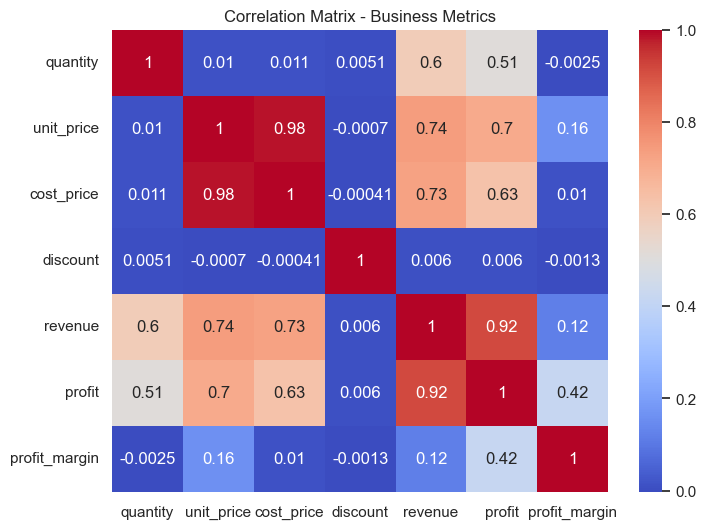

,quantity,unit_price,cost_price,discount,revenue,profit,profit_margin
quantity,1.000000,0.010106,0.010793,0.005125,0.595323,0.508341,-0.002522
unit_price,0.010106,1.000000,0.984667,-0.000696,0.738708,0.702685,0.161162
cost_price,0.010793,0.984667,1.000000,-0.000407,0.727956,0.629262,0.010485
discount,0.005125,-0.000696,-0.000407,1.000000,0.006005,0.005991,-0.001347
revenue,0.595323,0.738708,0.727956,0.006005,1.000000,0.916967,0.116839
profit,0.508341,0.702685,0.629262,0.005991,0.916967,1.000000,0.418407
profit_margin,-0.002522,0.161162,0.010485,-0.001347,0.116839,0.418407,1.000000


In [167]:
#Focused Correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[["quantity",
           "unit_price",
           "cost_price",
           "discount",
           "revenue",
           "profit",
           "profit_margin"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Business Metrics")
plt.show()

corr

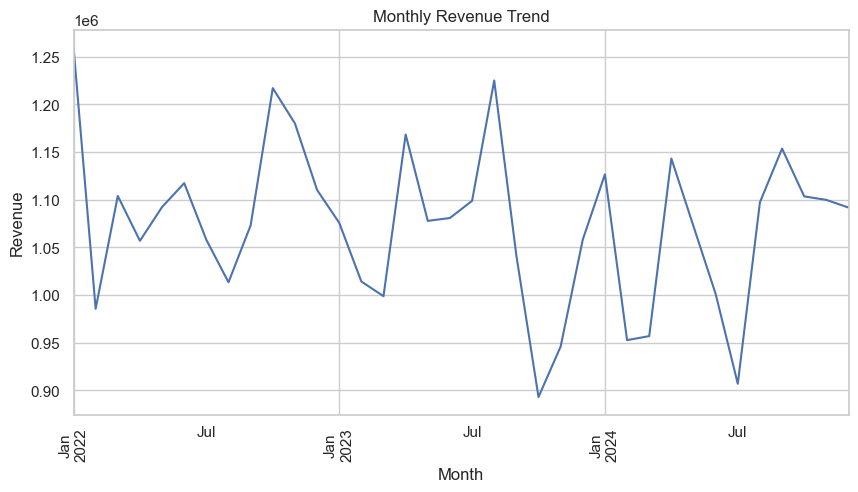

In [168]:
#PROFESSIONAL VISUALIZATION USING MATPLOTLIB
df["order_date"] = pd.to_datetime(df["order_date"])
df["year_month"] = df["order_date"].dt.to_period("M")

#Revenue Trend Over Time
monthly = df.groupby("year_month")["revenue"].sum()

plt.figure(figsize=(10,5))
monthly.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

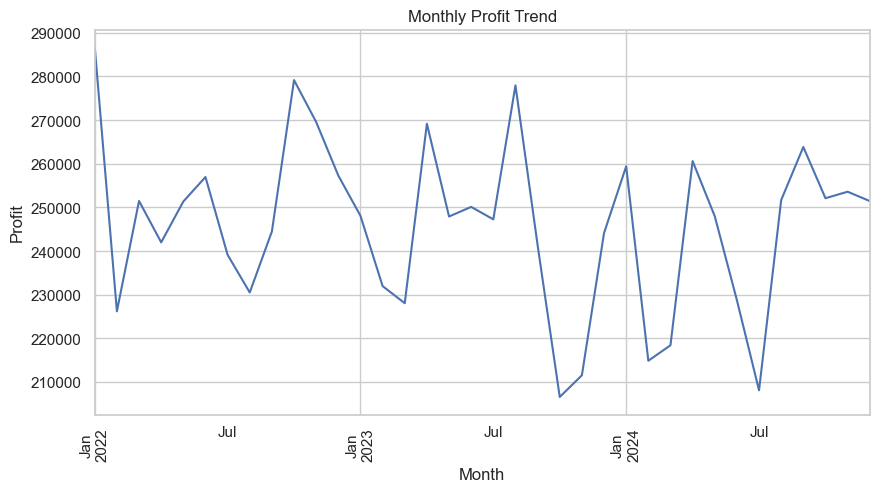

In [169]:
#Profit Trend Over Time
monthly_profit = df.groupby("year_month")["profit"].sum()

plt.figure(figsize=(10,5))
monthly_profit.plot()
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

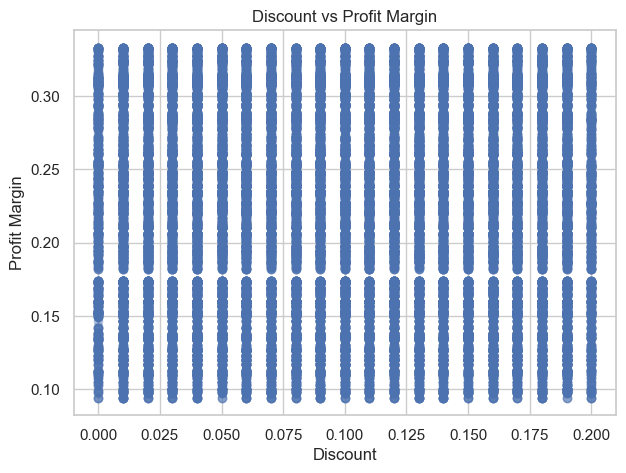

In [170]:
#Discount vs Profit Scatter
plt.figure(figsize=(7,5))
plt.scatter(df["discount"], df["profit_margin"], alpha=0.3)
plt.title("Discount vs Profit Margin")
plt.xlabel("Discount")
plt.ylabel("Profit Margin")
plt.show()


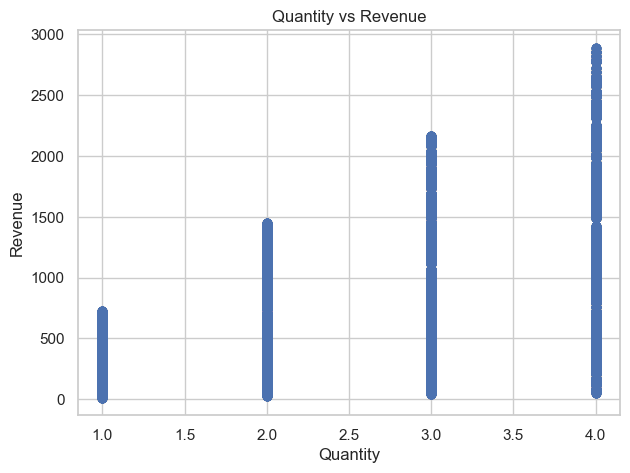

In [171]:
#Revenue vs Quantity
plt.figure(figsize=(7,5))
plt.scatter(df["quantity"], df["revenue"], alpha=0.3)
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

In [172]:
#Export for Power BI
fact_sales = df[[
    "order_id","order_date","customer_id","store_id","product_id",
    "quantity","unit_price","cost_price","discount","revenue","profit","profit_margin"
]].copy()

fact_sales.to_csv("fact_sales.csv", index=False)
print(fact_sales.shape)

dim_customers = df[[
    "customer_id","age","gender","city_y","join_date","loyalty_status"
]].drop_duplicates()

dim_customers.to_csv("dim_customers.csv", index=False)
print(dim_customers.shape)

dim_products = df[[
    "product_id","category","sub_category","brand","supplier_id"
]].drop_duplicates()

dim_products.to_csv("dim_products.csv", index=False)
print(dim_products.shape)

dim_stores = df[[
    "store_id","city_x","store_size_sqft","opening_date"
]].drop_duplicates()

dim_stores.to_csv("dim_stores.csv", index=False)
print(dim_stores.shape)

dim_suppliers = df[["supplier_id"]].drop_duplicates()
dim_suppliers.to_csv("dim_suppliers.csv", index=False)
print(dim_suppliers.shape)

print("Power BI files exported")

(44908, 12)
(2986, 6)
(300, 5)
(10, 4)
(25, 1)
Power BI files exported


In [173]:
import os
print(os.getcwd())

C:\Users\veda
